# Predicciones sobre posible cáncer de mama. Clasificando diagnósticos en benigno o maligno.

In [183]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 40)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 10,10
import seaborn as sns
from sklearn.datasets import load_breast_cancer


In [67]:
df = load_breast_cancer()
df = pd.DataFrame(pd.DataFrame(np.c_[df["data"] , df["target"]] ,columns= np.append(df["feature_names"] ,["target"])))
#0 == maligno
#1 == benigno
print('El número de diagnósticos malignos o benignos: \n' + str(df['target'].value_counts()))
print("--"*50 + '\n' + 'Las primeras cinco filas del set de datos:')
df.head()

El número de diagnósticos malignos o benignos: 
1.0    357
0.0    212
Name: target, dtype: int64
----------------------------------------------------------------------------------------------------
Las primeras cinco filas del set de datos:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Análisis previo de los datos

In [117]:
def caracteristicas(df):
    print("Dimensiones del set de datos : {}".format(df.shape))
    print("Número de columnas: {}".format(df.shape[1]))
    print("Número de filas: {}".format(df.shape[0]))
    
    print("--"*40) #separador
    
    numvar = df.select_dtypes(include = [np.number])
    catvar = df.select_dtypes(exclude = [np.number])
    print('El número de variables numéricas es: {}'.format(numvar.shape[1]))
    print('El número de variables categóricas es: {}'.format(catvar.shape[1]))
    
    print("--"*40)
    
    nulldat = df.isnull().sum()
    print('Tenemos los siguientes datos faltantes: {}'.format(nulldat))
    
    #nulldat_per = nulldat/ len(df) * 100
    #print('El porcentaje de datos faltantes es: {}'.format(nulldat_per))
    
    print("--"*40)
    
    print('Descripción estadística de los datos: ')
    stats = df.describe().transpose()
    return stats

In [116]:
caracteristicas(df)

Dimensiones del set de datos : (569, 31)
Número de columnas: 31
Número de filas: 569
--------------------------------------------------------------------------------
El número de variables numéricas es: 31
El número de variables categóricas es: 0
--------------------------------------------------------------------------------
Tenemos los siguientes datos faltantes: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture          

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Para que los plots no se vean muy sobrecargados vamos a mostrar pairplots de tres en tres.

Vamos a visualizar las características en pares: 


<Figure size 864x864 with 0 Axes>

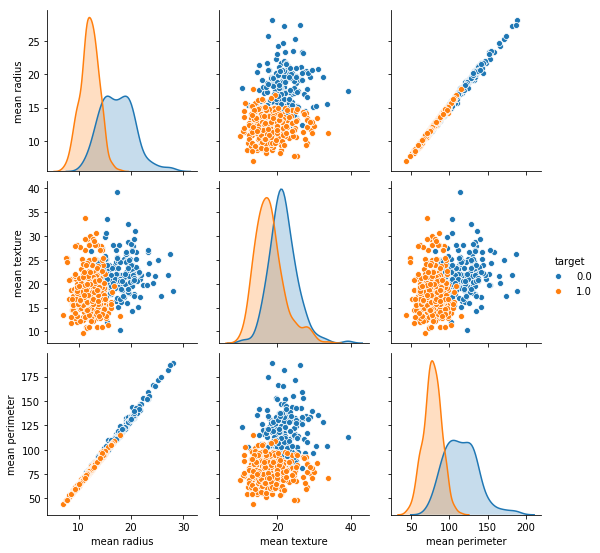

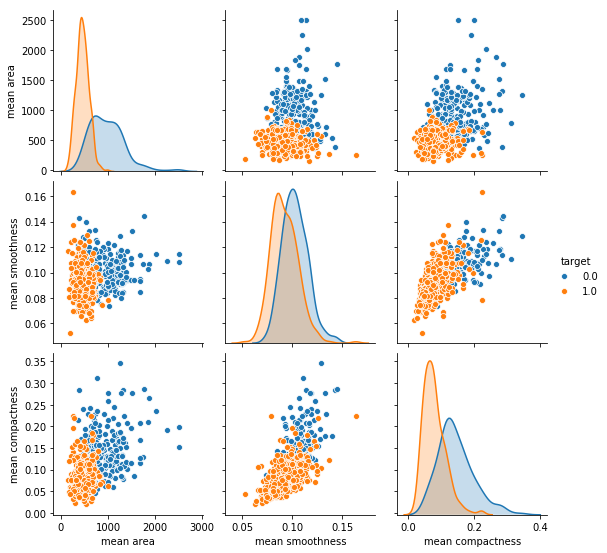

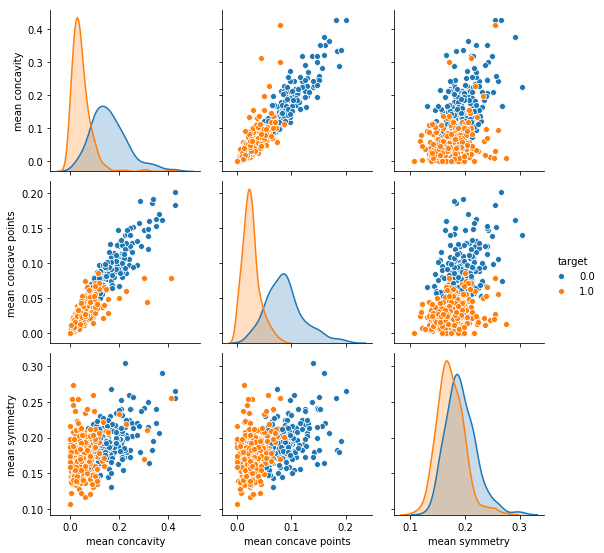

In [476]:
#Visualización de algunos datos. Para

caracteristicas =['mean radius','mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
                 'mean concavity','mean concave points','mean symmetry']

#Plot 1
print('Vamos a visualizar las características en pares: ')
plt.figure(figsize=(12,12))
f1 =sns.pairplot(data = df , hue = "target" , vars= caracteristicas[0:3])
f2 =sns.pairplot(data = df , hue = "target" , vars= caracteristicas[3:6])
f3 =sns.pairplot(data = df , hue = "target" , vars= caracteristicas[6:10])

Estudiemos ahora algunas de las características mediante boxplots: 


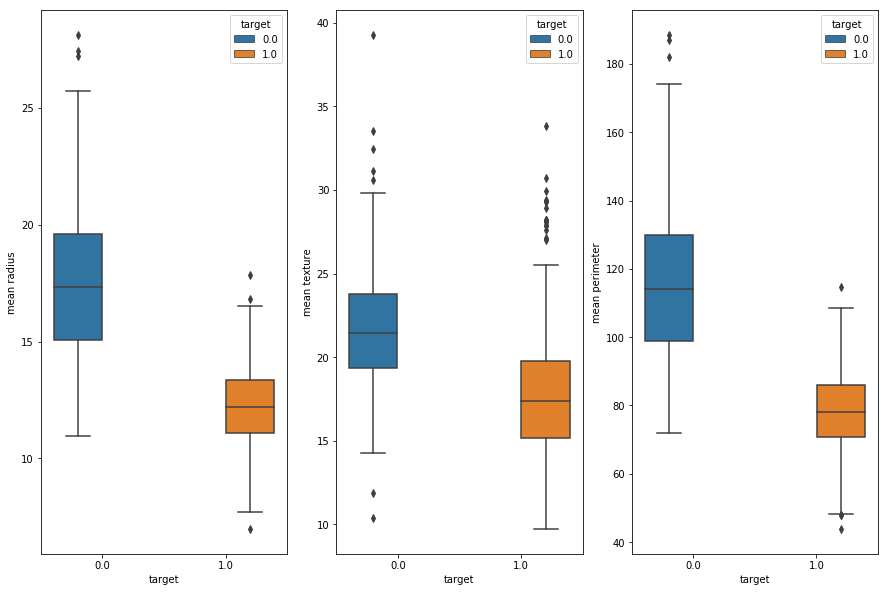

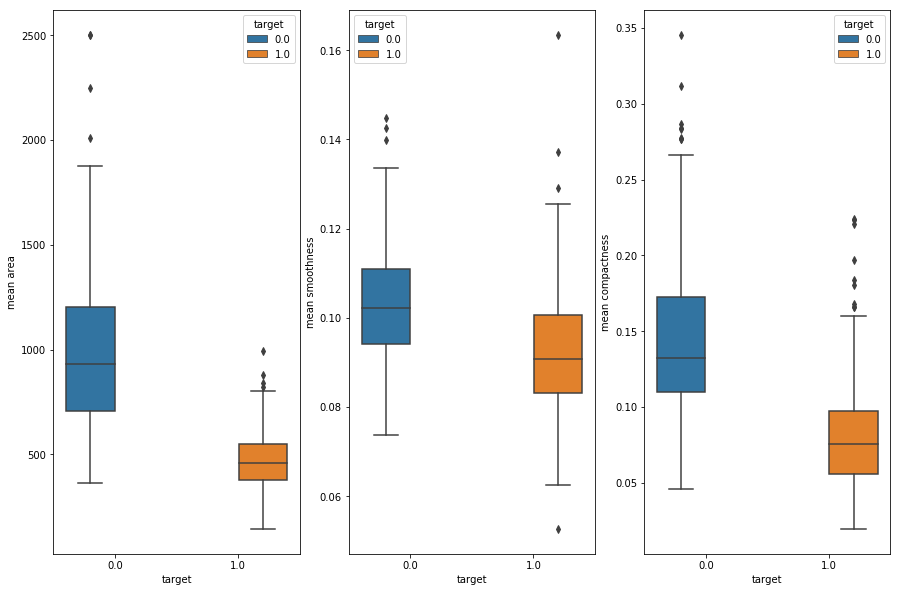

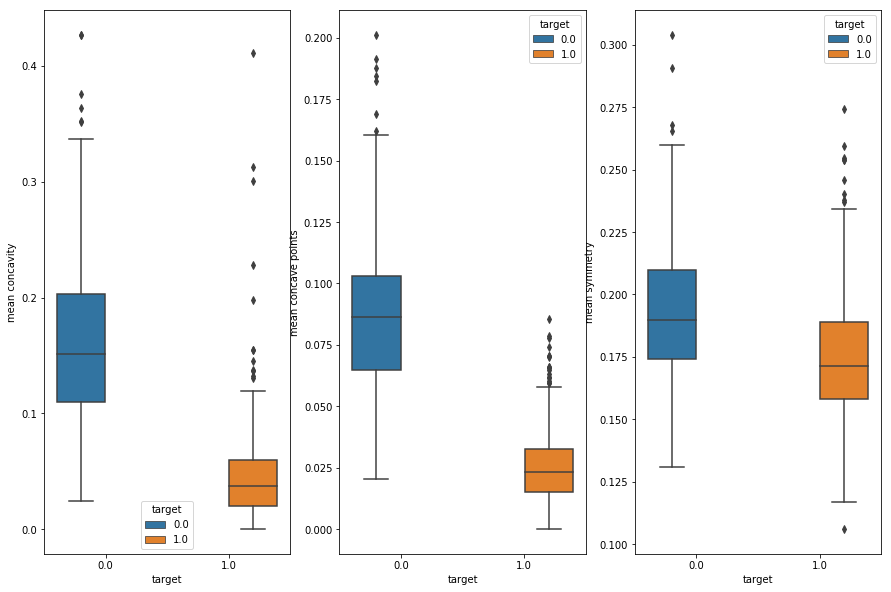

In [142]:
#Plot 2
print('Estudiemos ahora algunas de las características mediante boxplots: ')
f, axes = plt.subplots(1,3,figsize=(15,10))

fig1 = sns.boxplot(x='target', y=caracteristicas[0],hue='target',ax=axes[0],data=df)
fig2 = sns.boxplot(x='target',y=caracteristicas[1],hue='target',ax=axes[1],data=df)
fig3 = sns.boxplot(x='target',y=caracteristicas[2],hue='target',ax=axes[2],data=df)

f, axes2 = plt.subplots(1,3,figsize=(15,10))

fig1_2 = sns.boxplot(x='target', y=caracteristicas[3],hue='target',ax=axes2[0],data=df)
fig2_2 = sns.boxplot(x='target',y=caracteristicas[4],hue='target',ax=axes2[1],data=df)
fig3_2 = sns.boxplot(x='target',y=caracteristicas[5],hue='target',ax=axes2[2],data=df)

f, axes3 = plt.subplots(1,3,figsize=(15,10))

fig1_3 = sns.boxplot(x='target', y=caracteristicas[6],hue='target',ax=axes3[0],data=df)
fig2_3 = sns.boxplot(x='target',y=caracteristicas[7],hue='target',ax=axes3[1],data=df)
fig3_3 = sns.boxplot(x='target',y=caracteristicas[8],hue='target',ax=axes3[2],data=df)

## A continuación:

- Dada la distribución de los datos según el target (maligno o benigno), sería conveniente aplicar un modelo de clasificación SVM.
- Las características están en rangos muy distintos, debemos estandarizar.
- Solamente utilizaremos las primeras nueve características. Estudiaremos la correlación entre dichas variables.
- Se desarrollarán dos modelos con dos variaciones en cada uno: el primer modelo usará menos características y lo haremos con dos proporciones diferentes de train-test; el segundo modelo usará las nueve características mencionadas y también se usarán dos proporciones de train-test.
- El primer modelo usará las variables extraídas del análisis de correlación y el segundo todas.

# Correlación entre las variables a utilizar.

In [148]:
def correlacion(df):
    matriz_corr = df.corr()
    plt.figure(figsize = (15,15))
    
    #Construyendo un heatmap
    map_corr = sns.heatmap(data = matriz_corr,
                           cmap = "Blues",
                           fmt = "g",
                           linewidths = 1,
                           annot_kws = {"size": 16})
    return map_corr

In [205]:
def selector(df, threshold):
    corr_set = set()
    
    # matriz de correlacion
    matriz_corr = df.corr()

    for i in range(len(matriz_corr.columns)):
        for j in range(i):
            if abs(matriz_corr.iloc[i,j]) > threshold:
                matriz = matriz_corr.columns[i]
                
                # adding the values in set
                corr_set.add(matriz)
    return list(corr_set)

Número de características correlacionadas: 4
Lista de estas características: ['mean concavity', 'mean area', 'mean concave points', 'mean perimeter']


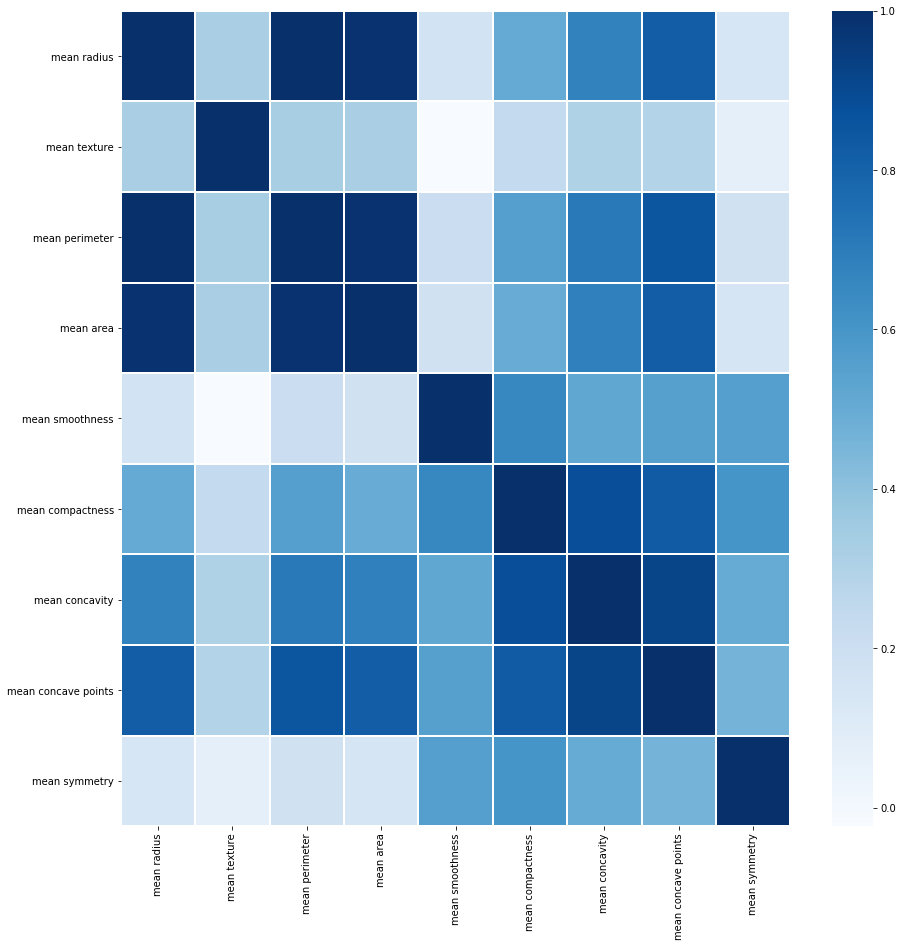

In [206]:
correlacion(df[caracteristicas])
print("Número de características correlacionadas: {}".format(len( selector(df[caracteristicas],0.7)   )))
print("Lista de estas características: {}".format(selector(df[caracteristicas],0.7)))

# Estandarizando las variables

In [192]:
caracteristicas =['mean radius','mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
                 'mean concavity','mean concave points','mean symmetry']
df_ML = df[caracteristicas]
df_ML.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [216]:
#Vamos a estandarizar de forma sencilla mediante división entre el valor máximo
for i in df_ML.columns.tolist():
    df_ML[i] = df_ML[i] / df_ML[i].max()
df_ML['target'] = df['target']
df_ML.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,target
0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,0.0
1,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,0.0
2,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,0.0
3,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,0.0
4,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,0.0


# Modelo 1: Usando variables con mayor correlación.

In [230]:
corr_feats= selector(df[caracteristicas],0.70)
corr_feats.append('target')
df_1= df_ML[corr_feats]
df_1.head()

,mean concavity,mean area,mean concave points,mean perimeter,target
0,0.703140,0.400240,0.731113,0.651459,0.0
1,0.203608,0.530188,0.348757,0.705040,0.0
2,0.462512,0.481008,0.635686,0.689655,0.0
3,0.565604,0.154378,0.522863,0.411565,0.0
4,0.463918,0.518593,0.518390,0.716711,0.0


La separación en train-test será tal que el 25% de los datos se utilicen para el testeo. Luego, vamos a reducir esto al 15% y veremos cual funciona mejor.

In [414]:
from sklearn.model_selection import train_test_split
X = df_1[['mean concavity', 'mean area', 'mean concave points', 'mean perimeter']]
Y = df_1['target']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 1,stratify=Y)

In [415]:
from sklearn import svm
from sklearn.metrics import f1_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [416]:
#Modelo 1.1
modelo_1_1 = svm.SVC(kernel='rbf')
modelo_1_1.fit(x_train,y_train)
y_pred_1_1 = modelo_1_1.predict(x_test)

El F1-Score es: = 0.916083916083916 y el índice Jaccard es: J=0.845946426454901

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        53
         1.0       0.93      0.93      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



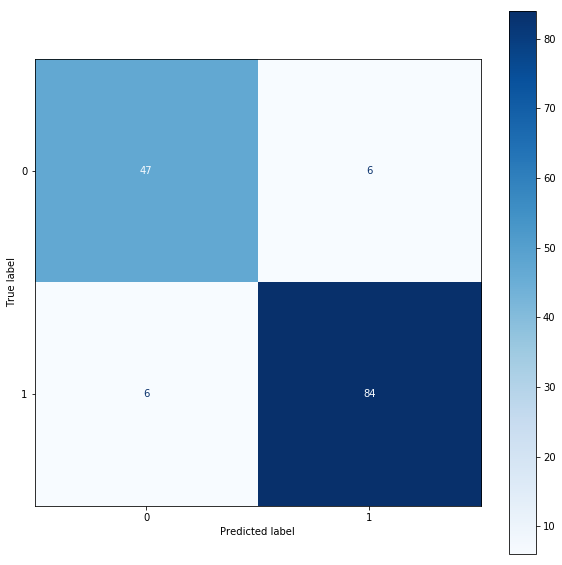

In [417]:
#Metrics
F1= f1_score(y_test, y_pred_1_1, average='weighted')
Jac = jaccard_score(y_test, y_pred_1_1,average='weighted')
matriz = confusion_matrix(y_test, y_pred_1_1, labels=[0,1])
print('El F1-Score es: = '+str(F1)+' y el índice Jaccard es: J='+str(Jac))
print('')
plot_confusion_matrix(modelo_1_1, x_test,y_test,labels=[0,1],cmap='Blues')
print(classification_report(y_test,y_pred_1_1))

In [473]:
accuracy = (47+84)/(47+84+6+6)
print('Tenemos una precisión del: {}'.format(accuracy))

Tenemos una precisión del: 0.916083916083916


In [419]:
#Modelo 1.2
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(X , Y , test_size = 0.15 , random_state = 1,stratify=Y)
modelo_1_2 = svm.SVC(kernel='rbf')
modelo_1_2.fit(x_train2,y_train2)
y_pred_1_2 = modelo_1_2.predict(x_test2)

El F1-Score es: = 0.9069767441860465 y el índice Jaccard es: J=0.830704802637441

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        32
         1.0       0.93      0.93      0.93        54

    accuracy                           0.91        86
   macro avg       0.90      0.90      0.90        86
weighted avg       0.91      0.91      0.91        86



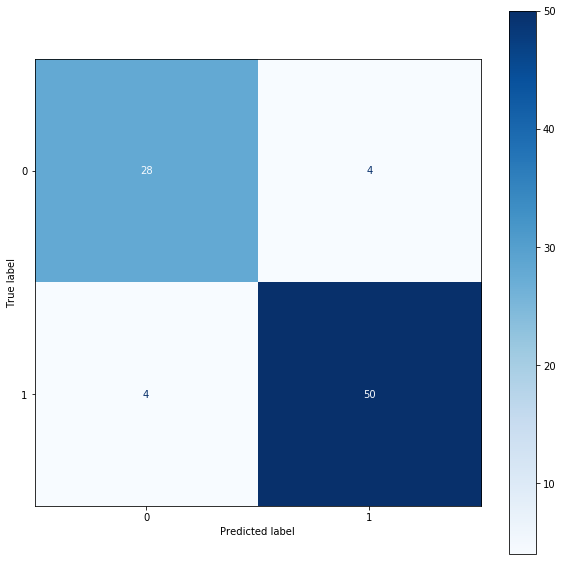

In [420]:
#Metrics
F1_b= f1_score(y_test2, y_pred_1_2, average='weighted')
Jac_b = jaccard_score(y_test2, y_pred_1_2,average='weighted')
matriz_b = confusion_matrix(y_test2, y_pred_1_2, labels=[0,1])
print('El F1-Score es: = '+str(F1_b)+' y el índice Jaccard es: J='+str(Jac_b))
print('')
plot_confusion_matrix(modelo_1_2, x_test2,y_test2,labels=[0,1],cmap='Blues')
print(classification_report(y_test2,y_pred_1_2))


In [472]:
accuracy2 = (28+50) / (50+28+4+4)
print('Tenemos una precisión del: {}'.format(accuracy2))

Tenemos una precisión del: 0.9069767441860465


# Modelo 2: utilizando las 9 variables visualizadas

In [395]:
X2 = df_ML[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness',
           'mean concavity', 'mean concave points', 'mean symmetry']]
Y2 = df_ML['target']

El F1-Score es: = 0.9440559440559441 y el índice Jaccard es: J= 0.8944183848999079

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        53
         1.0       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



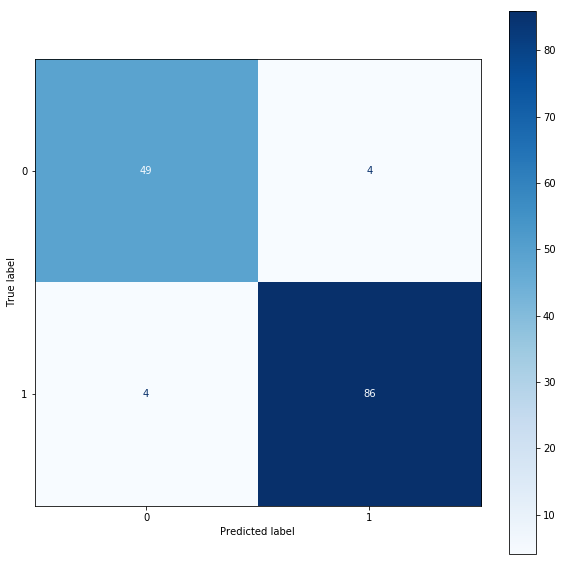

In [398]:
x2_train , x2_test , y2_train , y2_test = train_test_split(X2 , Y2 , test_size = 0.25 , random_state = 1, stratify=Y2)


modelo_2_1 = svm.SVC(kernel='rbf')
modelo_2_1.fit(x2_train, y2_train)
y_pred_2_1 = modelo_2_1.predict(x2_test)

F1_2a= f1_score(y2_test, y_pred_2_1, average='weighted')
Jac_2a = jaccard_score(y2_test, y_pred_2_1, average='weighted')
matriz_2a = confusion_matrix(y2_test, y_pred_2_1, labels=[0,1])


print('El F1-Score es: = ' + str(F1_2a) + ' y el índice Jaccard es: J= '+str(Jac_2a) )
print('')

plot_confusion_matrix(modelo_2_1, x2_test, y2_test, labels=[0,1], cmap='Blues')
print(classification_report(y2_test ,y_pred_2_1))

In [474]:
accuracy3 = (49+86)/(4+4+49+86)
print('Tenemos una precisión del: {}'.format(accuracy3))

Tenemos una precisión del: 0.9440559440559441


El F1-Score es: = 0.9420360122381422 y el índice Jaccard es: J=0.89078073089701

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        32
         1.0       0.96      0.94      0.95        54

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



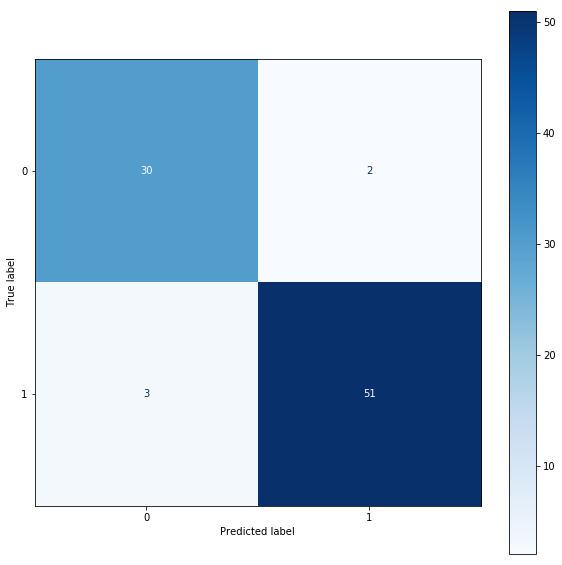

In [400]:
x2_train2 , x2_test2 , y2_train2 , y2_test2 = train_test_split(X2 , Y2 , test_size = 0.15 , random_state = 1, stratify=Y2)

modelo_2_2 = svm.SVC(kernel='rbf')
modelo_2_2.fit(x2_train2, y2_train2)
y_pred_2_2 = modelo_2_2.predict(x2_test2)


F1_2b= f1_score(y2_test2, y_pred_2_2, average='weighted')
Jac_2b = jaccard_score(y2_test2, y_pred_2_2,average='weighted')
matriz_2b = confusion_matrix(y2_test2, y_pred_2_2, labels=[0,1])


print('El F1-Score es: = '+str(F1_2b)+' y el índice Jaccard es: J='+str(Jac_2b))
print('')

plot_confusion_matrix(modelo_2_2, x2_test2,y2_test2,labels=[0,1],cmap='Blues')
print(classification_report(y2_test2,y_pred_2_2))

In [475]:
accuracy4 = (81)/(81+5)
print('Tenemos una precisión del: {}'.format(accuracy4))

Tenemos una precisión del: 0.9418604651162791


# Creando un dataframe con los resultados

In [422]:
modelo = ['SVM 1.1','SVM 1.2','SVM 2.1','SVM 2.2']
var = ['Correlacionadas','Correlacionadas','Todas','Todas']
accuracys = [accuracy, accuracy2, accuracy3, accuracy4]
F1s = [F1, F1_b, F1_2a, F1_2b]
Js = [Jac, Jac_b, Jac_2a, Jac_2b]
scores = pd.DataFrame(list(zip(modelo,var, accuracys,F1s,Js)), 
               columns =['Modelo', 'Variables Usadas','Accuracy', 'F1 Score','Jaccard']) 

In [423]:
scores

,Modelo,Variables Usadas,Accuracy,F1 Score,Jaccard
0,SVM 1.1,Correlacionadas,0.916084,0.916084,0.845946
1,SVM 1.2,Correlacionadas,0.906977,0.906977,0.830705
2,SVM 2.1,Todas,0.944056,0.944056,0.894418
3,SVM 2.2,Todas,0.941860,0.942036,0.890781


# ¿Y si probamos con una regresión logística?

In [424]:
from sklearn.linear_model import LogisticRegression


In [453]:
LogReg = LogisticRegression(C=1, solver='liblinear').fit(x_train, y_train)
LogReg2 = LogisticRegression(C=1, solver='liblinear').fit(x2_train, y2_train)

In [454]:
Y_pred1 = LogReg.predict(x_test)
Y_pred2 = LogReg2.predict(x2_test)

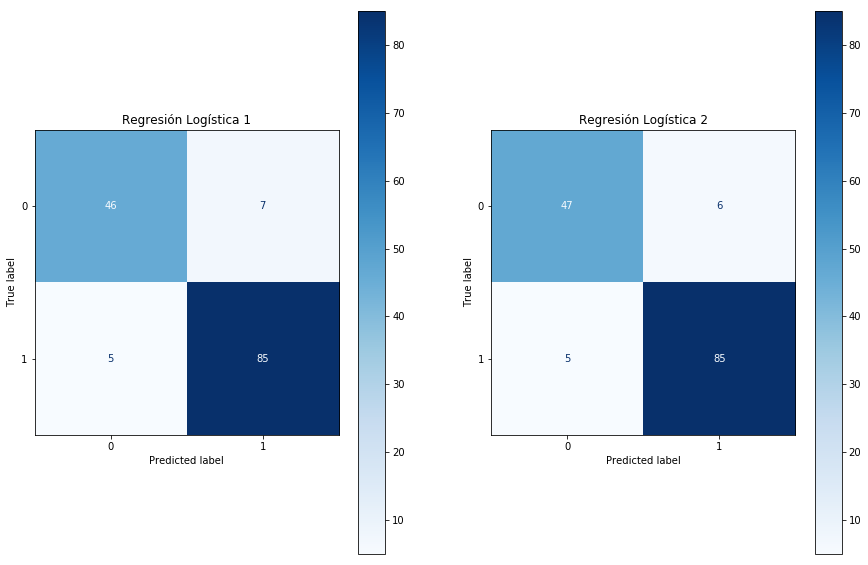

In [455]:
f, axes = plt.subplots(1,2,figsize=(15,10))
plot_confusion_matrix(LogReg, x_test , y_test, labels=[0,1], cmap='Blues', ax=axes[0])
xx =axes[0].set_title('Regresión Logística 1')
plot_confusion_matrix(LogReg2, x2_test ,y2_test, labels=[0,1], cmap='Blues',ax=axes[1])
xx2 =axes[1].set_title('Regresión Logística 2')

Vamos a utilizar GridSearchCV para ver si podemos mejorar los resultados cambiando los parámetros:

In [463]:
grid={"C":[0.01, 0.1, 1, 2, 5, 10, 20, 25], "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(LogReg,grid,cv=10).fit(x_train, y_train)
logreg2_cv=GridSearchCV(LogReg2,grid,cv=10).fit(x2_train, y2_train)

In [464]:
print('Los parámetros para la primera regresión: {}'.format(logreg_cv.best_params_))
print('Los parámetros para la segunda regresión: {}'.format(logreg2_cv.best_params_))

Los parámetros para la primera regresión: {'penalty': 'l2', 'C': 1}
Los parámetros para la segunda regresión: {'penalty': 'l2', 'C': 25}


In [465]:
LogReg_tuned = LogisticRegression(C=1, penalty='l2',  solver='liblinear').fit(x_train, y_train)
LogReg2_tuned = LogisticRegression(C=25,penalty='l2', solver='liblinear').fit(x2_train, y2_train)

In [468]:
Y_predtun = LogReg_tuned.predict(x_test)
Y_predtun2 = LogReg2_tuned.predict(x2_test)

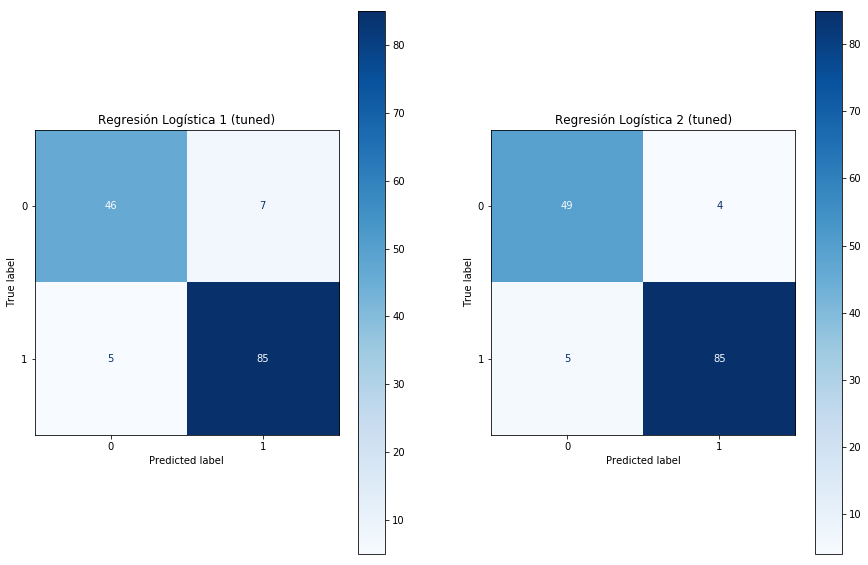

In [469]:
f, axes = plt.subplots(1,2,figsize=(15,10))
plot_confusion_matrix(LogReg_tuned, x_test , y_test, labels=[0,1], cmap='Blues', ax=axes[0])
xx =axes[0].set_title('Regresión Logística 1 (tuned)')
plot_confusion_matrix(LogReg2_tuned, x2_test ,y2_test, labels=[0,1], cmap='Blues',ax=axes[1])
xx2 =axes[1].set_title('Regresión Logística 2 (tuned)')

In [471]:
acc1 = (45+85)/(46+85+7+5)
acc2 = (49+85)/(49+85+4+5)
print('La accuracy de la primera regresión logística es: {}'.format(acc1))
print('La accuracy de la segunda regresión logística es: {}'.format(acc2))

La accuracy de la primera regresión logística es: 0.9090909090909091
La accuracy de la segunda regresión logística es: 0.9370629370629371


Vemos que la regresión logística no mejora los resultados del SVM, por lo que resultó acertado utilizar SVM desde un principio. Podría tratarse de optimizar los parámetros del SVM a través de GridSearch también y ver qué consecuencias tiene en la predicción de los resultados.

En realidad se necesitarían muchos mas datos para poder construir un modelo fiable, pero con esto podemos hacer una pequeña aproximación.